In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

df = pd.read_excel('datasets/Canada.xlsx', sheet_name= 'Canada by Citizenship',
                  skiprows = range(20), skipfooter = 2, engine = 'openpyxl')

df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.shape

(1013, 51)

In [3]:
years = list(map(str, range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [4]:
df.columns = list(map(str,df.columns))
df_t = pd.DataFrame(df[years].sum(axis=0))
df_t

,0
1980,286274.0
1981,257282.0
1982,242350.0
1983,178370.0
1984,176544.0
1985,168692.0
1986,198702.0
1987,304150.0
1988,323170.0
1989,383100.0


In [5]:
df_t.index = map(float,df_t.index)
df_t.reset_index(inplace = True)
df_t.head(2)

,index,0
0,1980.0,286274.0
1,1981.0,257282.0


In [6]:
df_t.columns = ['year', 'total',]
df_t.tail(2)

,year,total
32,2012.0,515806.0
33,2013.0,518042.0


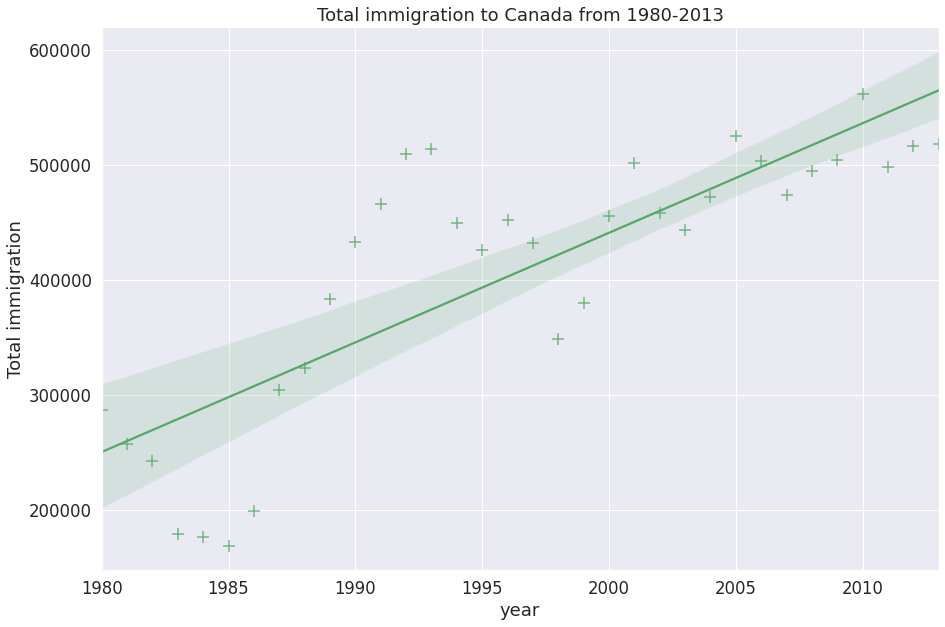

In [7]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
reg_plot = sns.regplot(x = 'year', y='total', data=df_t, marker='+',
                       color = 'g',
                      scatter_kws = {'s':150})
reg_plot.set(xlabel='year', ylabel= 'Total immigration')
reg_plot.set_title('Total immigration to Canada from 1980-2013')
plt.show()

In [8]:
df = pd.read_csv('datasets/headbrain.csv')
df.head(2)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297


In [9]:
a = df['Head Size(cm^3)']
b = df['Brain Weight(grams)']

In [10]:
np.corrcoef(a,b)

array([[1.        , 0.79956971],
       [0.79956971, 1.        ]])

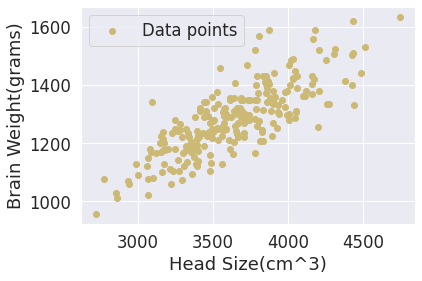

In [11]:
plt.scatter(a,b,c='y',label='Data points')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [12]:
import statsmodels.api as sm
model=sm.OLS.from_formula('b~a', data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      b   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           5.96e-54
Time:                        13:19:42   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.000     232.701     418.446
a              0.2634      0.013     20.409      0.000       0.238       0.289
==============================================================================
Omnibus:                        8.329   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.665
Skew:                           0.366   Prob(JB):                       0.0131
Kurtosis:                       3.584   Cond. No.                     3.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
X= pd.DataFrame(df['Head Size(cm^3)'])
Y= pd.DataFrame(df['Brain Weight(grams)'])
model_lm = lm.fit(X,Y)
model_lm

LinearRegression()

In [14]:
model_lm.intercept_

array([325.57342105])

In [15]:
model_lm.coef_

array([[0.26342934]])

In [16]:
model_lm.score(X,Y)

0.639311719957

In [20]:
brain_weight = pd.DataFrame ([200])
predict_headsize = model_lm.predict(brain_weight)
predict_headsize

array([[378.25928895]])

<function matplotlib.pyplot.show(*args, **kw)>

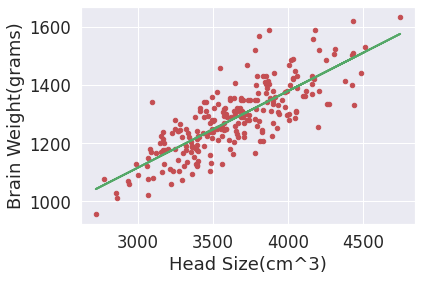

In [25]:
df.plot(kind='scatter', x='Head Size(cm^3)', 
        y='Brain Weight(grams)', color ='r')
plt.plot(X,model_lm.predict(X),
        linewidth=2, color='g')
plt.show

In [26]:
%ls 'datasets/'

adult.csv                  census.csv            pokemon.csv
airline_data.csv           cwurData.csv          sample_pivot.csv
antropometria00.csv        data.csv              tips.csv
antropometria-dataset.csv  headbrain.csv         weight-height.csv
Canada.xlsx                movies.csv
Cartwheeldata.csv          nhanes_2015_2016.csv


In [29]:
df= pd.read_csv('datasets/nhanes_2015_2016.csv')
df.head(5)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [28]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [30]:
vars = ['BPXSY1','RIDAGEYR','RIAGENDR','RIDRETH1','DMDEDUC2','BMXBMI',
       'SMQ020']
df = df[vars]
df

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
0,128.0,62,1,3,5.0,27.8,1
1,146.0,53,1,3,3.0,30.8,1
2,138.0,78,1,3,3.0,28.8,1
3,132.0,56,2,3,5.0,42.4,2
4,100.0,42,2,4,4.0,20.3,2
...,...,...,...,...,...,...,...
5730,112.0,76,2,3,3.0,21.5,1
5731,118.0,26,1,3,5.0,33.8,2
5732,154.0,80,2,3,4.0,31.0,1
5733,104.0,35,1,3,1.0,26.0,1


In [32]:
df = df[vars].dropna()
df.head(5)

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
0,128.0,62,1,3,5.0,27.8,1
1,146.0,53,1,3,3.0,30.8,1
2,138.0,78,1,3,3.0,28.8,1
3,132.0,56,2,3,5.0,42.4,2
4,100.0,42,2,4,4.0,20.3,2


In [33]:
df[vars].corr()

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
BPXSY1,1.000000,0.455142,-0.097076,-0.010871,-0.146381,0.118100,-0.083701
RIDAGEYR,0.455142,1.000000,-0.021398,-0.042591,-0.140524,0.023089,-0.115328
RIAGENDR,-0.097076,-0.021398,1.000000,-0.025863,0.029587,0.080463,0.186230
RIDRETH1,-0.010871,-0.042591,-0.025863,1.000000,0.305590,-0.156051,0.006584
DMDEDUC2,-0.146381,-0.140524,0.029587,0.305590,1.000000,-0.052670,0.086895
BMXBMI,0.118100,0.023089,0.080463,-0.156051,-0.052670,1.000000,-0.015199
SMQ020,-0.083701,-0.115328,0.186230,0.006584,0.086895,-0.015199,1.000000


In [36]:
model = sm.OLS.from_formula('BPXSY1~RIDAGEYR+RIAGENDR',data=df)
result =model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     697.4
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          1.87e-268
Time:                        13:43:45   Log-Likelihood:                -21505.
No. Observations:                5102   AIC:                         4.302e+04
Df Residuals:                    5099   BIC:                         4.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.0949      0.984    108.790      0.000     105.165     109.025
RIDAGEYR       0.4739      0.013     36.518      0.000       0.448       0.499
RIAGENDR      -3.2322      0.459     -7.040      0.000      -4.132      -2.332
==============================================================================
Omnibus:                      706.732   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1582.730
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       5.184   Cond. No.                         239.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""